In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [6]:
df = pd.read_csv('KNN_Project_Data')

In [7]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


<h1>Standardizing dataset</h1>

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis = 1))

In [13]:
df_scaled = pd.DataFrame(scaled_features,columns = df.columns[:-1])

In [14]:
df_scaled

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762
...,...,...,...,...,...,...,...,...,...,...
995,0.776682,0.758234,-1.753322,0.507699,0.174588,-1.279354,-1.797957,0.431419,0.088717,1.188886
996,-0.313446,0.385206,0.885502,-0.083136,-1.208486,0.309242,0.746346,-0.112571,-1.763636,-1.559081
997,-0.358895,-0.979015,0.837715,0.014018,-1.397424,0.054473,0.164120,-1.514726,-0.275122,0.864287
998,0.275080,-0.992399,0.030371,1.062954,1.142871,-0.192872,2.051386,-0.036233,0.436685,-0.212456


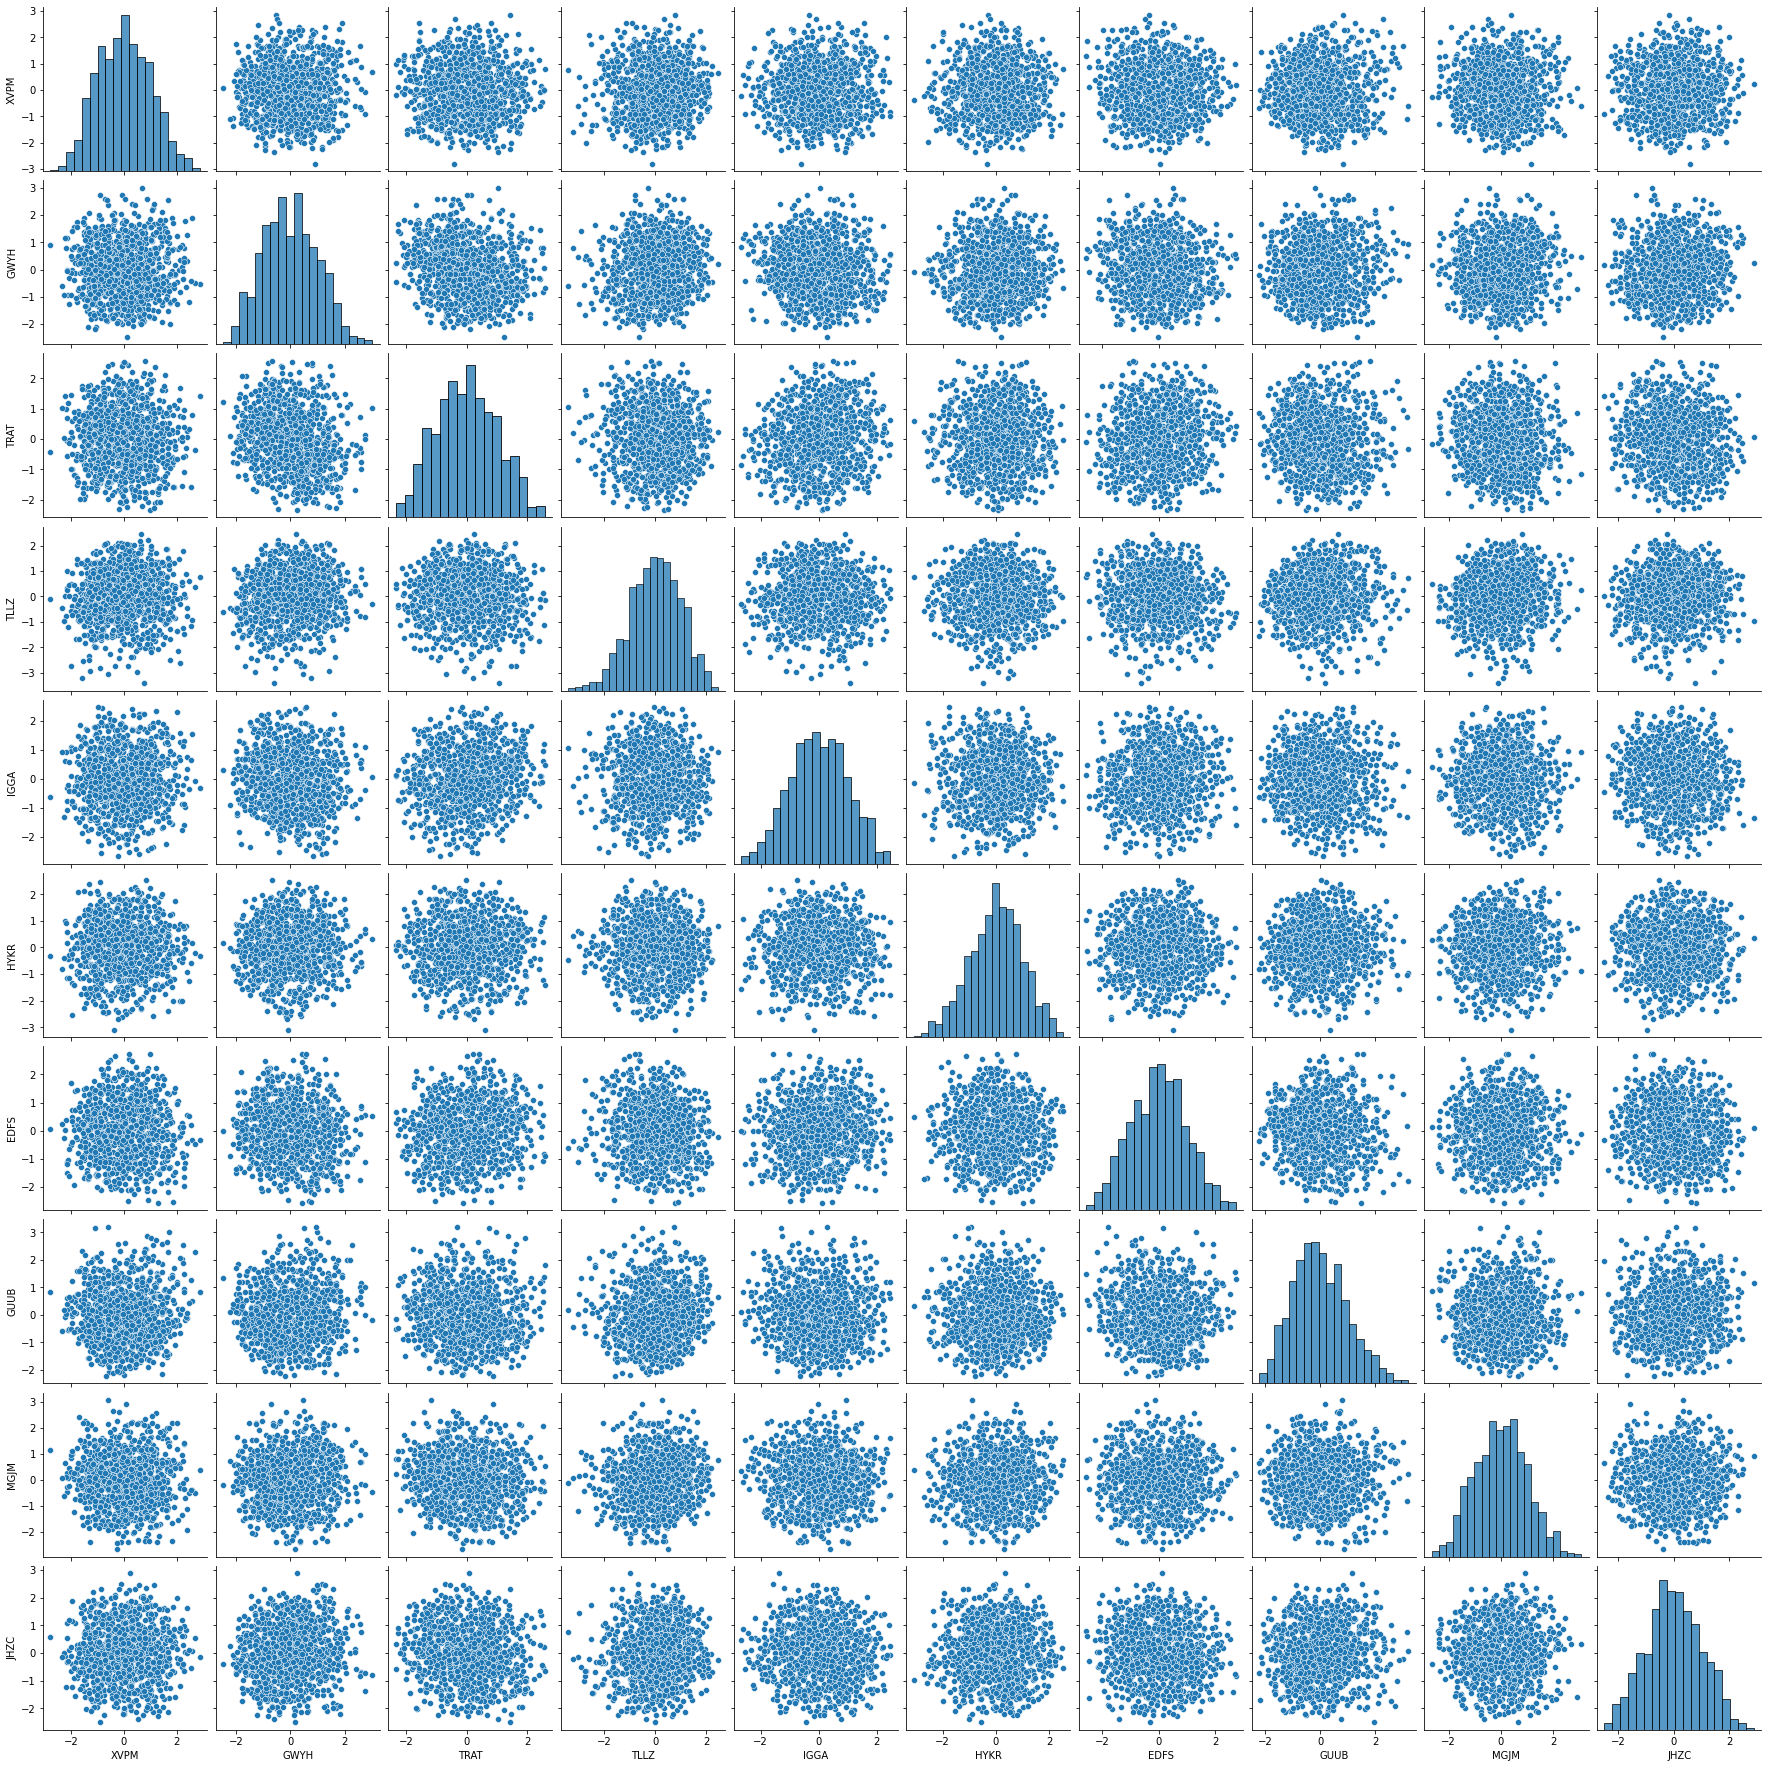

In [18]:
sns.pairplot(df_scaled,palette='coolwarm')

<h1>Prediction</h1>

In [19]:
X = df_scaled
y = df['TARGET CLASS']

In [21]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)

<h1>Evaluation</h1>

In [30]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       162
           1       0.72      0.71      0.72       168

    accuracy                           0.71       330
   macro avg       0.71      0.71      0.71       330
weighted avg       0.71      0.71      0.71       330

[[115  47]
 [ 48 120]]


<h1>Finding new K value</h1>

In [55]:
error_rate = []
for i in range(1,40):
    knn_new = KNeighborsClassifier(n_neighbors=i)
    knn_new.fit(X_train,y_train)
    prediction_new = knn_new.predict(X_test)
    error_rate.append(np.mean(prediction_new != y_test))

Text(0, 0.5, 'error rate')

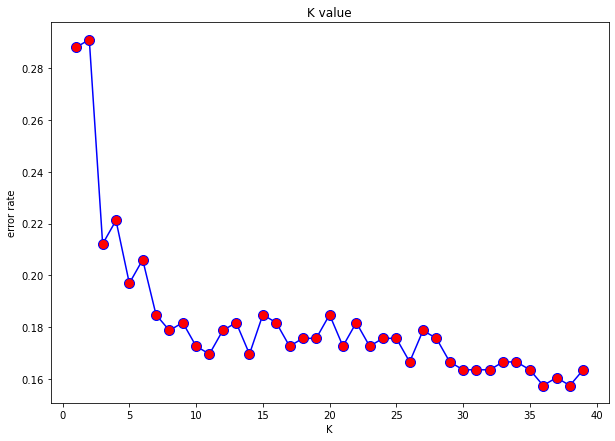

In [56]:
plt.figure(figsize=(10,7))
plt.plot(range(1,40),error_rate,marker='o',color='blue',linestyle='solid',markersize=10,markerfacecolor='red',)
plt.title('K value')
plt.xlabel('K')
plt.ylabel('error rate')

<h1>Prediction and Evaluation with new K value</h1>

In [58]:
knn_updated = KNeighborsClassifier(n_neighbors=32)
knn_updated.fit(X_train,y_train)
prediction_updated = knn_updated.predict(X_test)
print(classification_report(y_test,prediction_updated))
print(confusion_matrix(y_test,prediction_updated))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       162
           1       0.84      0.85      0.84       168

    accuracy                           0.84       330
   macro avg       0.84      0.84      0.84       330
weighted avg       0.84      0.84      0.84       330

[[134  28]
 [ 26 142]]
